In [7]:
import os
os.chdir("..")
print(os.getcwd())

/Users/av3n/University/bachelorThesis/NumericPrototype-NewMetrics


In [ ]:

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from data_loader import AdultIncomeDataLoader

data_loader = AdultIncomeDataLoader(test_size=0.2, random_state=42)
X_temp, X_test, y_temp, y_test, input_dim, additional_info = data_loader.load_data()

# Further split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.2,  # 20% of the remaining data for validation
    random_state=42
)

# Hyperparameter tuning with BayesSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Define the search space
search_spaces = {
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3),
    'n_estimators': Integer(100, 500),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'min_child_weight': Integer(1, 10),
    'gamma': Real(0, 1)
}

# Initialize the search
opt = BayesSearchCV(
    xgb.XGBClassifier(objective='binary:logistic', random_state=42),
    search_spaces,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Perform the search
opt.fit(X_train, y_train)

# Get the best hyperparameters
best_params = opt.best_params_
print("Best hyperparameters:")
print(best_params)

# Train the model with the best hyperparameters
model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    **best_params
)

# Fit the model
model.fit(X_train, y_train)

# Make predictions on all sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate accuracy for all sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate generalization gap
gen_gap_val = abs(train_accuracy - val_accuracy)
gen_gap_test = abs(train_accuracy - test_accuracy)

print(f"\nGeneralization gap (train-val): {gen_gap_val:.4f}")
print(f"Generalization gap (train-test): {gen_gap_test:.4f}")


Best hyperparameters:
OrderedDict([('colsample_bytree', 1.0), ('gamma', 0.2559105737816086), ('learning_rate', 0.3), ('max_depth', 3), ('min_child_weight', 1), ('n_estimators', 500), ('subsample', 1.0)])
Training Accuracy: 0.8859
Validation Accuracy: 0.8628
Test Accuracy: 0.8707

Generalization gap (train-val): 0.0231
Generalization gap (train-test): 0.0152


[0]	train-logloss:0.52141	train-auc:0.89300	eval-logloss:0.52675	eval-auc:0.89151


/opt/homebrew/Caskroom/miniconda/base/envs/tf2/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[100]	train-logloss:0.25802	train-auc:0.94292	eval-logloss:0.28305	eval-auc:0.92860
[200]	train-logloss:0.23565	train-auc:0.95390	eval-logloss:0.27949	eval-auc:0.93003
[202]	train-logloss:0.23536	train-auc:0.95401	eval-logloss:0.27939	eval-auc:0.93006

Model Performance Metrics:
Accuracy: 0.8729
Precision: 0.7849
Recall: 0.6869
F1 Score: 0.7327
ROC AUC: 0.9301


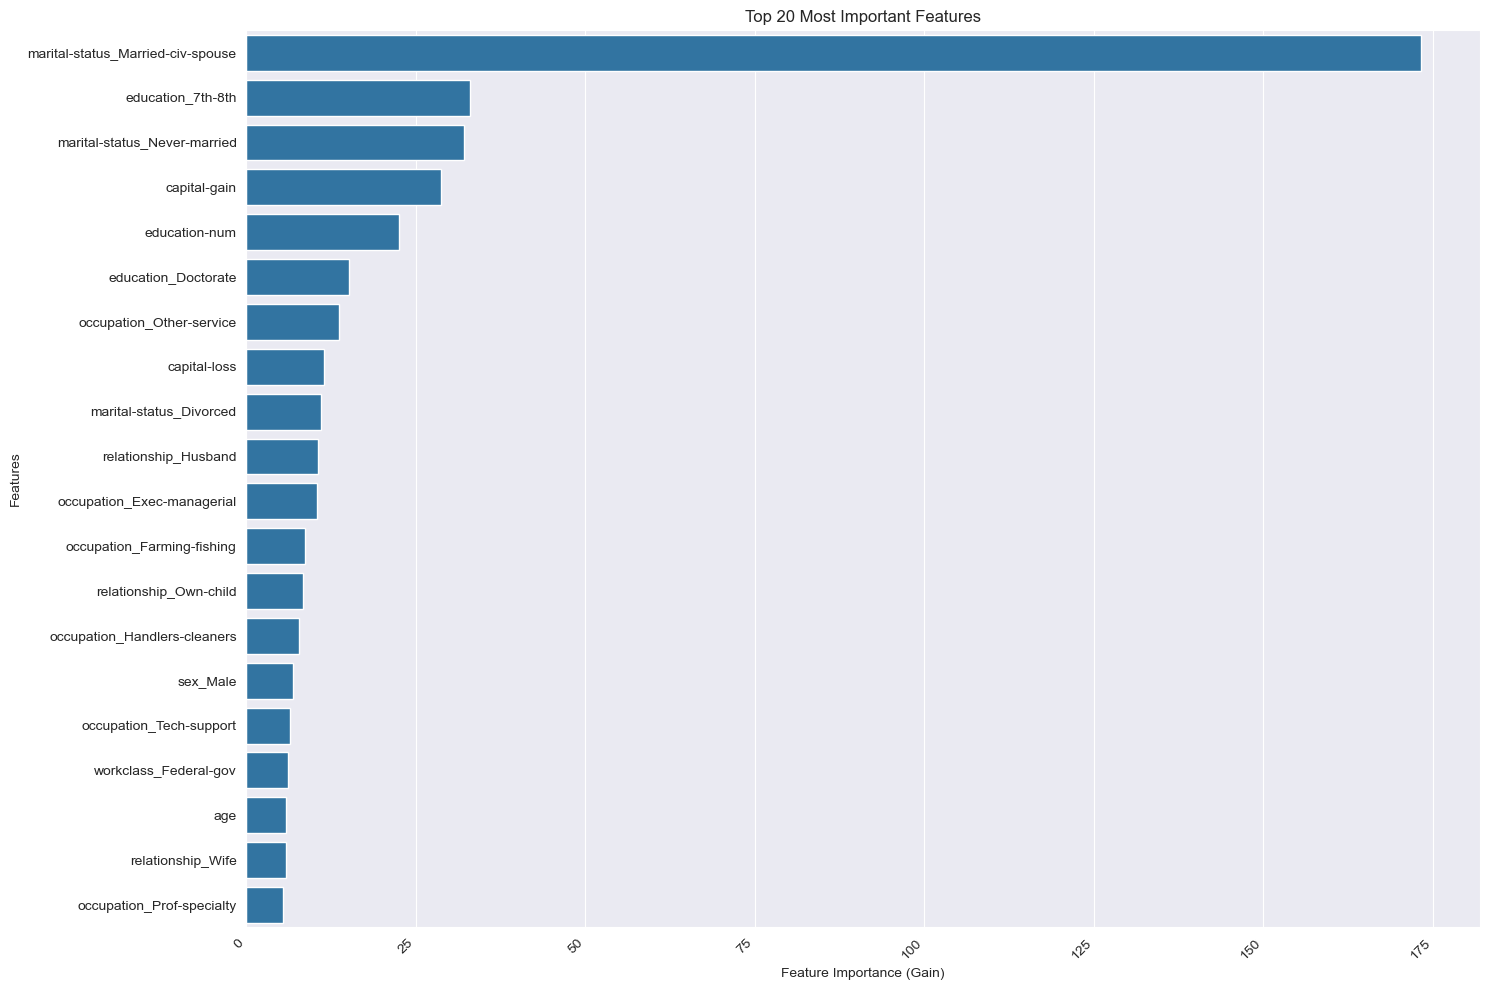

[0]	train-auc:0.89768+0.00074	test-auc:0.89214+0.00322
[1]	train-auc:0.90364+0.00166	test-auc:0.89777+0.00232
[2]	train-auc:0.90465+0.00169	test-auc:0.89900+0.00324
[3]	train-auc:0.90929+0.00115	test-auc:0.90262+0.00260
[4]	train-auc:0.91145+0.00050	test-auc:0.90470+0.00288
[5]	train-auc:0.91379+0.00028	test-auc:0.90729+0.00283
[6]	train-auc:0.91489+0.00025	test-auc:0.90807+0.00276
[7]	train-auc:0.91546+0.00024	test-auc:0.90873+0.00301
[8]	train-auc:0.91630+0.00026	test-auc:0.90948+0.00272
[9]	train-auc:0.91671+0.00034	test-auc:0.90993+0.00299
[10]	train-auc:0.91698+0.00037	test-auc:0.91037+0.00277
[11]	train-auc:0.91735+0.00029	test-auc:0.91060+0.00281
[12]	train-auc:0.91826+0.00048	test-auc:0.91145+0.00265
[13]	train-auc:0.91901+0.00037	test-auc:0.91196+0.00269
[14]	train-auc:0.91996+0.00033	test-auc:0.91248+0.00277
[15]	train-auc:0.92022+0.00042	test-auc:0.91264+0.00278
[16]	train-auc:0.92082+0.00038	test-auc:0.91312+0.00295
[17]	train-auc:0.92118+0.00031	test-auc:0.91325+0.00294
[1

In [ ]:

import os
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from data_loader import AdultIncomeDataLoader
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and load the data
data_loader = AdultIncomeDataLoader(test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test, input_dim, additional_info = data_loader.load_data()

# Get numerical and categorical columns from additional_info
numerical_cols = additional_info['numerical_cols']
categorical_cols = additional_info['categorical_cols']
preprocessor = additional_info['preprocessor']

# Generate feature names
def get_feature_names(numerical_cols, categorical_cols, preprocessor):
    """Get feature names after preprocessing."""
    # Get feature names for categorical columns (one-hot encoded)
    onehot_features = []
    for i, column in enumerate(categorical_cols):
        encoder = preprocessor.named_transformers_['cat']
        categories = encoder.categories_[i]
        for cat in categories:
            onehot_features.append(f"{column}_{cat}")
    
    # Combine all feature names
    feature_names = numerical_cols + onehot_features
    return feature_names

# Get the feature names
feature_names = get_feature_names(numerical_cols, categorical_cols, preprocessor)

# Create DMatrix objects for XGBoost with feature names
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': ['logloss', 'auc'],
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'tree_method': 'hist'
}

# Train the model with early stopping
num_rounds = 1000
early_stopping_rounds = 10

watchlist = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(
    params,
    dtrain,
    num_rounds,
    watchlist,
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=100
)

# Make predictions
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_pred_proba)
}

# Print metrics
print("\nModel Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Feature importance analysis
feature_importance = model.get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(feature_importance.keys()),
    'Importance': list(feature_importance.values())
})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(15, 10))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the model
model.save_model('xgb_ctr_model.json')

# Optional: Cross-validation
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=100,
    nfold=5,
    metrics=['auc'],
    early_stopping_rounds=10,
    verbose_eval=True
)

print("\nCross-validation results:")
print(cv_results)

# Print top 20 most important features
print("\nTop 20 Most Important Features:")
print(importance_df.head(20).to_string())
